## Домашнее задание № 4

### Ансамблевые методы 

**Дедлайн: 3.06.2020 0:30** 
Сопровождайте код изображениями и комментариями. Не игнорируйте вопросы, ваши выводы тоже оцениваются. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше. Не забывайте подписывать графики и будет вам счастье!

**Максимальный балл: 10**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import heapq
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import os

%matplotlib inline

**0. (0 баллов) ** Загрузите [датасет](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data), в нем вы найдете данные опрошенных женщин из индейского племени Пима. Будем решать задачу бинарной классификации: в колонке Outcome лежит метка наличия или отсутствия диабета - это наша целевая переменная. Есть ли пропущенные значения?

In [2]:
data = pd.read_csv('./diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
def second_smallest(data):
    return heapq.nsmallest(2, set(data))[-1]

In [5]:
def has_zeros(data):
    a = np.array(data)
    return len(a[np.nonzero(a)]) != len(data)

In [6]:
def print_data_info(data):
    for column in data.columns:
        if (column == 'Outcome'):
            continue
        print(column)
        print('has zeros:', has_zeros(data[column]))
        print('min value =', data[column].min())
        print('second min value =', second_smallest(data[column]))
        print('max value =', data[column].max(), end='\n\n')

In [7]:
print_data_info(data)

Pregnancies
has zeros: True
min value = 0
second min value = 1
max value = 17

Glucose
has zeros: True
min value = 0
second min value = 44
max value = 199

BloodPressure
has zeros: True
min value = 0
second min value = 24
max value = 122

SkinThickness
has zeros: True
min value = 0
second min value = 7
max value = 99

Insulin
has zeros: True
min value = 0
second min value = 14
max value = 846

BMI
has zeros: True
min value = 0.0
second min value = 18.2
max value = 67.1

DiabetesPedigreeFunction
has zeros: False
min value = 0.078
second min value = 0.084
max value = 2.42

Age
has zeros: False
min value = 21
second min value = 22
max value = 81



**1. (0.5 балла)** Как вы думаете, является ли наличие нулей в некоторых колонках фактом того, что эти признаки имеют пропущенные значения? Замените нули на среднее значение признака там, где считаете это целесообразным.

Из всех колонок нулевые значения имеют: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin и BMI. Я думаю, что наличие нулей во всех колонках кроме Pregnancies является фактом того, что эти признаки имеют пропущенные значения.

In [8]:
def len_without_zeroes(data):
    a = np.array(data)
    return len(a[np.nonzero(a)])

In [9]:
def replace_zeroes_by_mean(column):
    replace_value = sum(data[column]) / len_without_zeroes(data[column])
    print(column, 'mean = ', replace_value)
    data[column] = data[column].replace(0, replace_value)    

In [10]:
replace_zeroes_by_mean('Glucose')
replace_zeroes_by_mean('BloodPressure')
replace_zeroes_by_mean('SkinThickness')
replace_zeroes_by_mean('Insulin')
replace_zeroes_by_mean('BMI')

Glucose mean =  121.6867627785059
BloodPressure mean =  72.40518417462484
SkinThickness mean =  29.153419593345657
Insulin mean =  155.5482233502538
BMI mean =  32.45746367239099


In [11]:
# Проверим, что все успешно заменилось
print_data_info(data)

Pregnancies
has zeros: True
min value = 0
second min value = 1
max value = 17

Glucose
has zeros: False
min value = 44.0
second min value = 56.0
max value = 199.0

BloodPressure
has zeros: False
min value = 24.0
second min value = 30.0
max value = 122.0

SkinThickness
has zeros: False
min value = 7.0
second min value = 8.0
max value = 99.0

Insulin
has zeros: False
min value = 14.0
second min value = 15.0
max value = 846.0

BMI
has zeros: False
min value = 18.2
second min value = 18.4
max value = 67.1

DiabetesPedigreeFunction
has zeros: False
min value = 0.078
second min value = 0.084
max value = 2.42

Age
has zeros: False
min value = 21
second min value = 22
max value = 81



**2. (1 балл)** Визуализируйте распределение признаков по отдельности для больных диабетом и здоровых. Ваши графики должны быть примерно такими:

![Image](https://d.radikal.ru/d03/2005/f8/0ffb9443cbcf.png)

In [12]:
def split_by_outcome(column):
    has_diabete = []
    has_no_diabete = []
    for i in range(len(data)):
        if data.Outcome[i] == 0:
            has_no_diabete.append(data[column][i])
        else:
            has_diabete.append(data[column][i])
    
    return (has_diabete, has_no_diabete)

In [13]:
def show_plots(data):
    fig, axs = plt.subplots(3, 3, figsize=(20, 20))
    horizontal = 0
    vertical = 0
    for column in data.columns:
        x, y = split_by_outcome(column)
        bins = np.linspace(data[column].min(), data[column].max(), 30)
        axs[horizontal, vertical].hist(x, bins, alpha=0.5, label='has diabetes = True', color='purple')
        axs[horizontal, vertical].hist(y, bins, alpha=0.5, label='has diabetes = False')
        axs[horizontal, vertical].set(xlabel=column)
        axs[horizontal, vertical].legend(loc='upper right')
        if horizontal < 2:
            horizontal += 1
        else:
            horizontal = 0
            vertical +=1

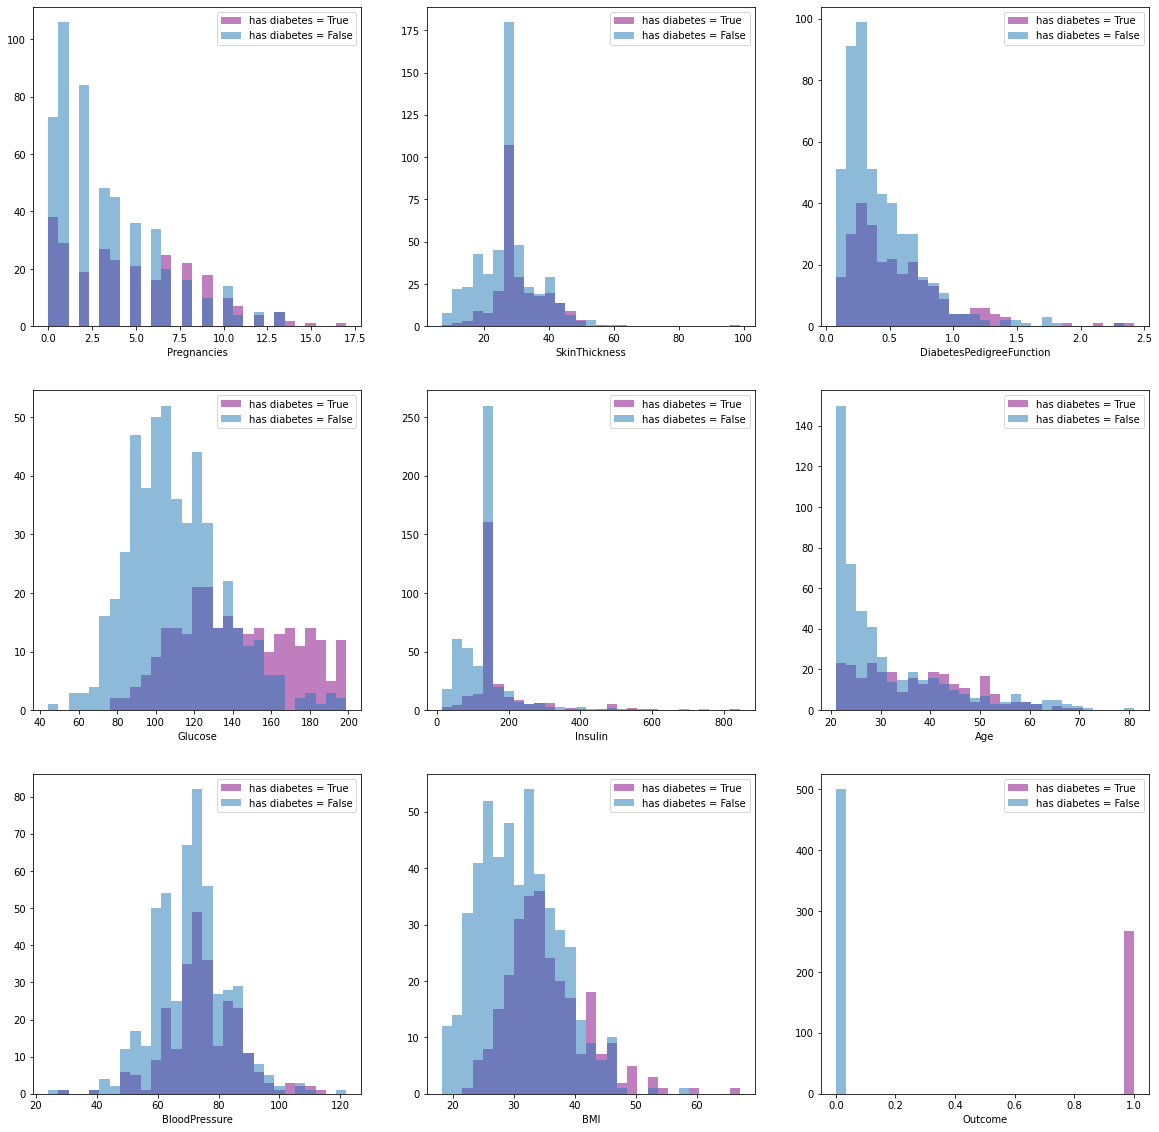

In [14]:
show_plots(data)

**3. (2 балла)** Разбейте данные на обучающую и тестовую часть в соотношении 70:30. Обучите *BaggingClassifier* на деревьях (поставьте параметр *base_estimator = DecisionTreeClassifier()*) и *RandomForest*. Возьмите количество базовых алгоритмов, равное 10. Посчитайте accuracy, recall и precision. Есть ли какая-то разница между моделями и их результатами? Как вы думаете, почему получились такие результаты?

*tip: создайте отдельную функцию для вывода метрик качества;*

In [15]:
X = data.drop('Outcome', axis=1)
y = data.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [17]:
def print_metrics(y_real, y_pred):
    print('accuracy =', accuracy_score(y_real, y_pred))
    print('recall =', recall_score(y_real, y_pred))
    print('precision =', precision_score(y_real, y_pred))

In [18]:
bag_d_tree_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=1514).fit(X_train, y_train)
print_metrics(y_test, bag_d_tree_clf.predict(X_test))

accuracy = 0.7272727272727273
recall = 0.575
precision = 0.6133333333333333


In [19]:
bag_r_forest_clf = RandomForestClassifier(n_estimators=10, random_state=1514).fit(X_train, y_train)
print_metrics(y_test, bag_r_forest_clf.predict(X_test))

accuracy = 0.7316017316017316
recall = 0.575
precision = 0.6216216216216216


accuracy, precision и recall у модели, использующей случайный лес получились немного выше, чем у модели, использующей бэггинг с решающими деревьями. Это связано с тем, что метод случайного леса является улучшенным продолжением метода бэггинга с решающими деревьями и заключается в устранении корреляции между деревьями.

**4. (2 балл)** Для случайного леса проанализируйте значение ROC-AUC на этих же данных в зависимости от изменения параметров:
* *n_estimators* (можно перебрать около 10 значений из отрезка от 10 до 1500)
* *min_samples_leaf* (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости ROC-AUC от этих параметров. Какие выводы можете сделать?

In [20]:
n_estimators = [10, 25, 50, 100, 250, 500, 750, 1000, 1250, 1500]
fprs = []
tprs = []
roc_auc_scores = []
feature_importances = []
for n in n_estimators:
    bag_r_forest_clf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1).fit(X_train, y_train)
    y_pred_proba = np.array(bag_r_forest_clf.predict_proba(X_test)[:,1])
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
    fprs.append(fpr)
    tprs.append(tpr)
    roc_auc_scores.append(roc_auc_score(y_test, y_pred_proba))
    feature_importances.append(bag_r_forest_clf.feature_importances_)

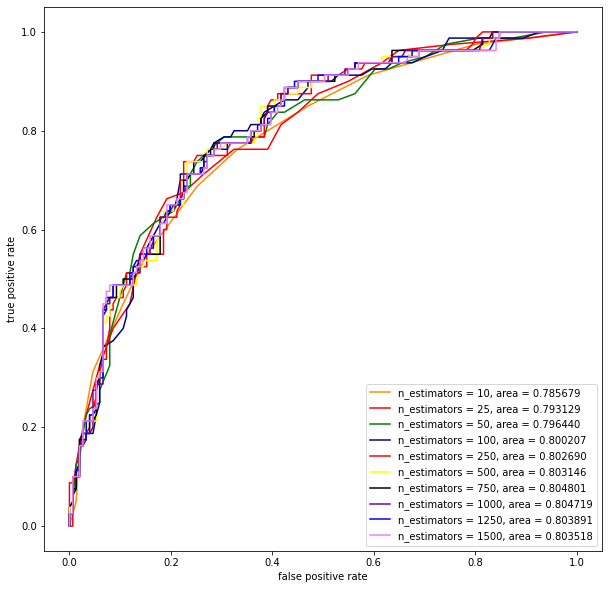

In [21]:
colors = ['darkorange', 'red', 'green', 'navy', 'red', 'yellow', 'black', 'purple', 'blue', 'violet']

plt.figure(figsize=(10, 10))
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
for i in range(10):
    plt.plot(fprs[i], tprs[i], colors[i], label=f'n_estimators = {n_estimators[i]}, area = {roc_auc_scores[i]:4f}')   
plt.legend(loc="lower right")
plt.show()

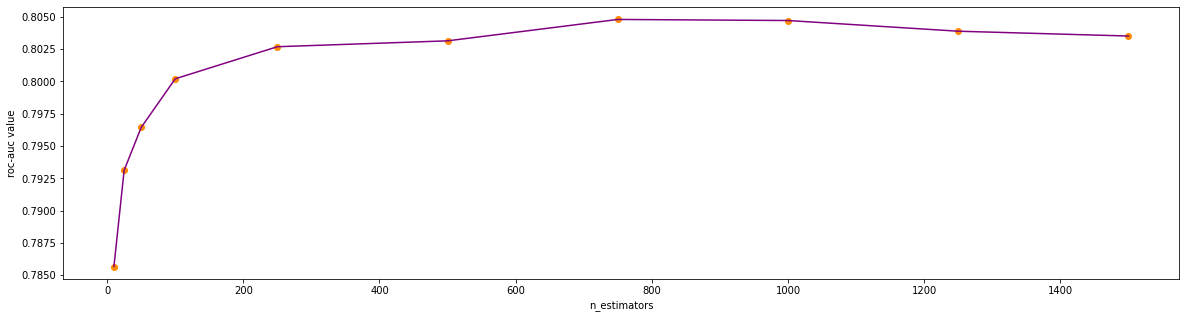

In [22]:
plt.figure(figsize=(20, 5))
plt.ylabel('roc-auc value')
plt.xlabel('n_estimators')
plt.plot(n_estimators, roc_auc_scores, color='purple') 
plt.scatter(n_estimators, roc_auc_scores, color='darkorange') 
plt.show()

Лучший результат получился при n_estimators = 750, а дальше значение roc-auc score начинает падать.

In [23]:
def get_column(data, index):
    return pd.Series(np.array(feature_importances)[:,index])

def get_feature_importances_table(feature_importances):
    return {'Pregnancies': get_column(feature_importances, 0), 
         'Glucose': get_column(feature_importances, 1),
         'BloodPressure': get_column(feature_importances, 2),
         'SkinThickness': get_column(feature_importances, 3),
         'Insulin': get_column(feature_importances, 4),
         'BMI': get_column(feature_importances, 5),
         'DiabetesPedigreeFunction': get_column(feature_importances, 6),
         'Age': get_column(feature_importances, 7)}

In [24]:
n_estimators_feature_importances = pd.DataFrame(get_feature_importances_table(feature_importances))

In [25]:
fprs = []
tprs = []
roc_auc_scores = []
feature_importances = []
min_samples_leaves = np.arange(1, 50, 5)
for n in min_samples_leaves:
    bag_r_forest_clf = RandomForestClassifier(random_state=42, min_samples_leaf=n, n_jobs=-1).fit(X_train, y_train)
    y_pred_proba = np.array(bag_r_forest_clf.predict_proba(X_test)[:,1])
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
    fprs.append(fpr)
    tprs.append(tpr)
    roc_auc_scores.append(roc_auc_score(y_test, y_pred_proba))
    feature_importances.append(bag_r_forest_clf.feature_importances_)

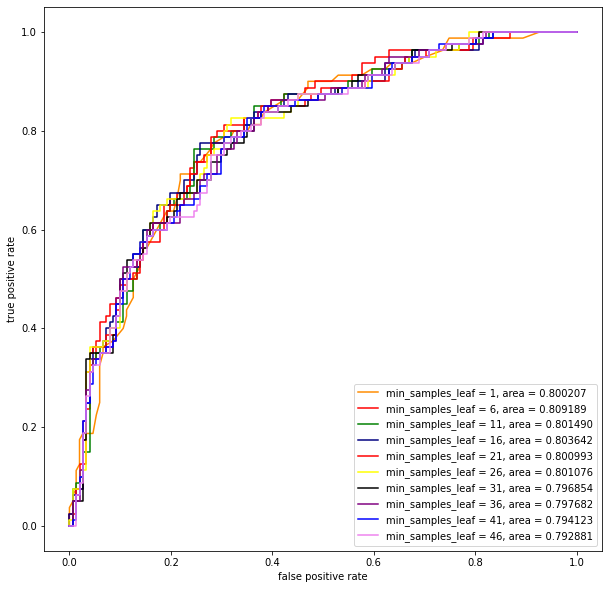

In [26]:
plt.figure(figsize=(10, 10))
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
for i in range(10):
    plt.plot(fprs[i], tprs[i], colors[i], label=f'min_samples_leaf = {min_samples_leaves[i]}, area = {roc_auc_scores[i]:4f}')   
plt.legend(loc="lower right")
plt.show()

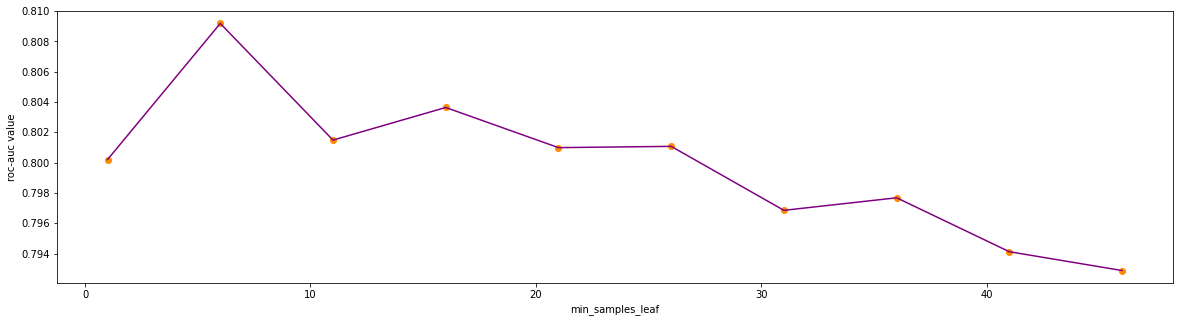

In [27]:
plt.figure(figsize=(20, 5))
plt.ylabel('roc-auc value')
plt.xlabel('min_samples_leaf')
plt.plot(min_samples_leaves, roc_auc_scores, color='purple') 
plt.scatter(min_samples_leaves, roc_auc_scores, color='darkorange') 
plt.show()

Лучший результат получился при min_sample_leaf = 6, а дальше значение roc-auc score начинает падать, хотя и периодически колеблется в сторону увеличения по сравнению с ближайшими значениями.

In [28]:
min_samples_leaf_feature_importances = pd.DataFrame(get_feature_importances_table(feature_importances))

**5. (1 балл)**. Посмотрите, оказались ли какие-то признаки более важными, чем остальные? Воспользуйтесь соответствующим аттрибутом случайного леса в библиотеке sklearn, чтобы построить barplot.

In [29]:
n_estimators_feature_importances

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.079907,0.246475,0.100228,0.065902,0.086259,0.168945,0.114704,0.137579
1,0.075406,0.269688,0.078639,0.072332,0.082275,0.164670,0.116600,0.140390
2,0.072770,0.277792,0.084409,0.071510,0.082325,0.162956,0.111687,0.136551
3,0.076466,0.279764,0.081237,0.072878,0.085035,0.153812,0.114693,0.136115
4,0.073684,0.267973,0.082341,0.075050,0.086103,0.159643,0.115820,0.139386
5,0.070940,0.268707,0.082654,0.075779,0.087198,0.162136,0.111342,0.141243
6,0.072206,0.269171,0.081666,0.073976,0.086206,0.163202,0.111395,0.142178
7,0.072252,0.269113,0.081184,0.073706,0.087213,0.163792,0.110993,0.141746
8,0.071692,0.268500,0.080669,0.073363,0.087617,0.164583,0.111307,0.142267
9,0.071956,0.268272,0.080411,0.073652,0.087460,0.164133,0.111507,0.142608


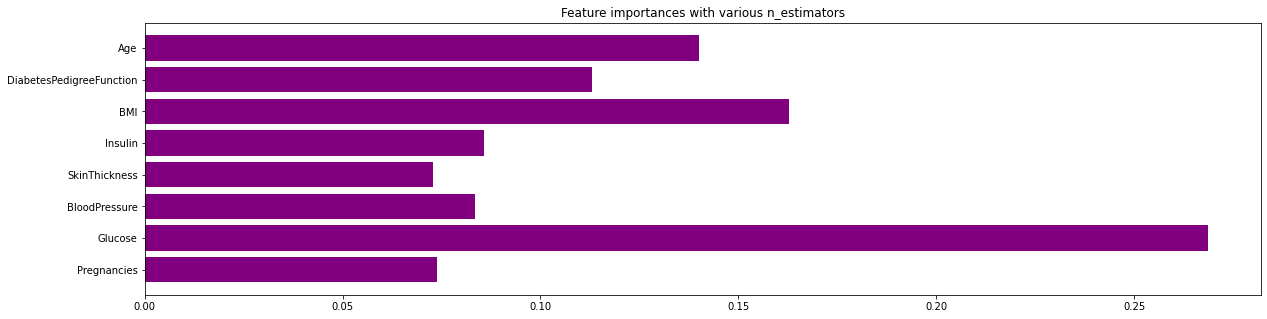

In [30]:
plt.figure(figsize=(20, 5))
plt.title("Feature importances with various n_estimators")
plt.barh(range(X_test.shape[1]), n_estimators_feature_importances.mean(0), color="purple", align="center")
plt.yticks(range(X.shape[1]), X_test.columns)
plt.show()

In [31]:
min_samples_leaf_feature_importances

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.076466,0.279764,0.081237,0.072878,0.085035,0.153812,0.114693,0.136115
1,0.064917,0.365892,0.049316,0.052434,0.075793,0.175027,0.078072,0.138548
2,0.062138,0.388742,0.041532,0.049461,0.069887,0.172508,0.066617,0.149114
3,0.064567,0.414504,0.030553,0.040495,0.064992,0.173591,0.056412,0.154887
4,0.060925,0.430455,0.026578,0.039741,0.065362,0.183286,0.046962,0.146689
5,0.060304,0.423423,0.026727,0.043028,0.062235,0.170684,0.047636,0.165962
6,0.060183,0.423249,0.021313,0.044490,0.065842,0.176281,0.038329,0.170313
7,0.063748,0.422769,0.022470,0.040222,0.057657,0.183196,0.037720,0.172219
8,0.053684,0.428441,0.018210,0.035492,0.057957,0.183470,0.033852,0.188896
9,0.049352,0.425129,0.018048,0.038913,0.052959,0.191831,0.030920,0.192848


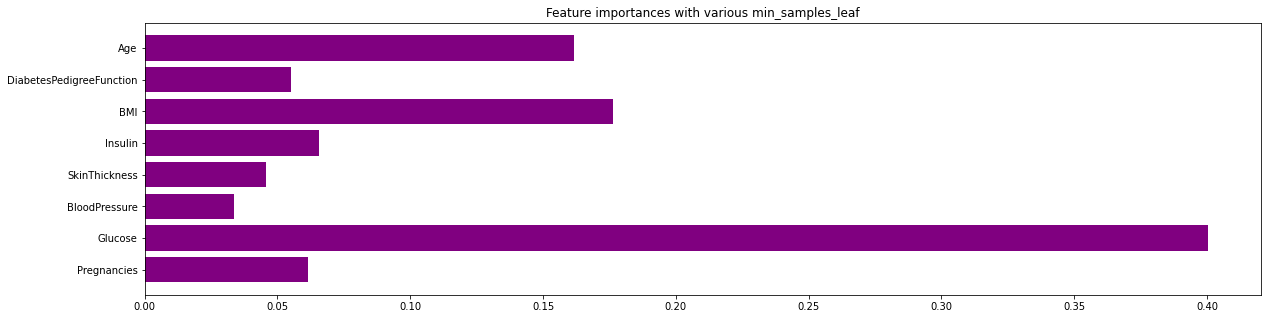

In [32]:
plt.figure(figsize=(20, 5))
plt.title("Feature importances with various min_samples_leaf")
plt.barh(range(X_test.shape[1]), min_samples_leaf_feature_importances.mean(0), color="purple", align="center")
plt.yticks(range(X.shape[1]), X_test.columns)
plt.show()

Среди всех признаков наиболее важными оказались Glucose, BMI и Age.

**6. (2 балла)** Обучите HistGradientBoostingClassifier и GradientBoostingClassifier из sklearn. Опишите подробно, в чем заключается разница этих моделей. Подберите подходящее количество деревьев и проанализируйте метрики, с которыми мы работали выше.

In [64]:
def find_best_hyperparameters_gradient_boosting():
    param_grid_gbclf = {'n_estimators': np.arange(1, 150, 1)}
    gbclf = GradientBoostingClassifier(random_state=42)
    gridSearchCVgbclf = GridSearchCV(gbclf, param_grid_gbclf, scoring='neg_root_mean_squared_error')
    gridSearchCVgbclf.fit(X_train, y_train)
    
    return gridSearchCVgbclf.best_params_

До этого пробовала с np.arange(1, 1000, 75) – лучший получился в 76, поэтому уменьшила до 150 и шаг соответственно.

In [65]:
hyperparameters = find_best_hyperparameters_gradient_boosting()
print(hyperparameters)

{'n_estimators': 113}


In [66]:
gbclf = GradientBoostingClassifier(n_estimators = hyperparameters['n_estimators'], random_state=42)
gbclf.fit(X_train, y_train)
gbclf_y_pred = gbclf.predict(X_test)
print_metrics(y_test, gbclf_y_pred)

accuracy = 0.7402597402597403
recall = 0.7
precision = 0.6086956521739131


idk, вручную получилось найти значения n_estimators, дающие чуть лучшие значения метрик:

In [73]:
gbclf = GradientBoostingClassifier(n_estimators = 101, random_state=42)
gbclf.fit(X_train, y_train)
gbclf_y_pred = gbclf.predict(X_test)
print_metrics(y_test, gbclf_y_pred)

accuracy = 0.7445887445887446
recall = 0.7
precision = 0.6153846153846154


In [85]:
def find_best_hist_hyperparameters_gradient_boosting():
    param_grid_hgbclf = {'max_iter': np.arange(1, 150, 1)}
    hgbclf = HistGradientBoostingClassifier(random_state=42)
    gridSearchCVhgbclf = GridSearchCV(hgbclf, param_grid_hgbclf, scoring='neg_root_mean_squared_error')
    gridSearchCVhgbclf.fit(X_train, y_train)
    
    return gridSearchCVhgbclf.best_params_

In [86]:
hyperparameters = find_best_hist_hyperparameters_gradient_boosting()
print(hyperparameters)

{'max_iter': 16}


In [87]:
hgbclf = HistGradientBoostingClassifier(max_iter = hyperparameters['max_iter'], random_state=42)
hgbclf.fit(X_train, y_train)
hgbclf_y_pred = hgbclf.predict(X_test)
print_metrics(y_test, hgbclf_y_pred)

accuracy = 0.7662337662337663
recall = 0.6875
precision = 0.6547619047619048


In [ ]:
В отличие от предыдущего классификатора, здесь немного упал re

**7. (1.5 балла)** Вспомните, что представляет собой [стэкинг моделей](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier). Возьмите в качестве базовых моделей любой ансамблевый метод из тех, которые были использованы выше, и простой классфикатор из уже вами изученных на курсе. Как final_estimator используйте лог-регресссию. Посчитайте метрики для мета-классификатора. Улучшилось ли качество?

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

*tip: не забудьте завести список базовых алгоритмов*
<code>
base_learners = [
                 ('name1', model1(),
                 ('name2', model2())             
                ]

</code>